In [1]:
from importlib import reload
# from imp import reload
import matplotlib.pyplot as plt
from ipcv import cvlib, scanner

reload(cvlib)
reload(scanner)

<module 'ipcv.scanner' from '/Users/everhett/Projects/python-ws/qr-scanner/ipcv/scanner.py'>

In [2]:
# A function to display side-by-side visuals for comparisons.
def display(source_img, cropped_img):
    # Display the previous and current side-by-side for visual comparison.
    plt.figure(figsize=(14, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(source_img, cmap='gray')
    plt.title('Source Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img, cmap='gray')
    plt.title('Cropped Image')

Image               : image-size=5,648,120, [RXC]=[1,676 X 3,370]
[1] --Binarize      : at min-thresh=80, black=96.00%, white=5.00%, thresh-cnt=0, limit-cnt=0
[2] --Binarize      : at min-thresh=80, black=96.00%, white=5.00%, thresh-cnt=0, limit-cnt=0
[3] --Binarize      : at min-thresh=96, black=96.00%, white=5.00%, thresh-cnt=0, limit-cnt=0
[4] --Binarize      : at min-thresh=112, black=95.00%, white=6.00%, thresh-cnt=0, limit-cnt=0
[5] --Binarize      : at min-thresh=128, black=95.00%, white=6.00%, thresh-cnt=0, limit-cnt=0
[6] --Binarize      : at min-thresh=144, black=94.00%, white=7.00%, thresh-cnt=0, limit-cnt=0
[7] --Binarize      : at min-thresh=160, black=94.00%, white=7.00%, thresh-cnt=0, limit-cnt=0
[8] --Binarize      : at min-thresh=176, black=93.00%, white=8.00%, thresh-cnt=0, limit-cnt=0
[9] --Binarize      : at min-thresh=192, black=93.00%, white=8.00%, thresh-cnt=0, limit-cnt=0
[10] --Binarize      : at min-thresh=208, black=92.00%, white=9.00%, thresh-cnt=0, limit-cn

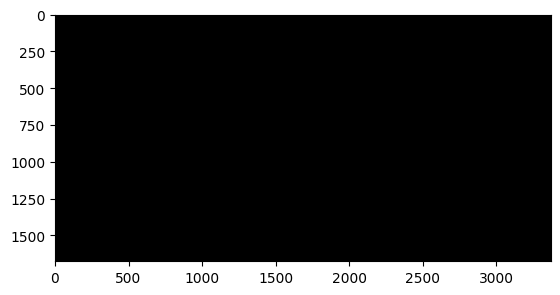

In [53]:
reload(cvlib)
reload(scanner)
#
image = cvlib.load_image('resources/barcode/barcode102.png')

# Backup-3, working for most except(10,121)
cropped = scanner.detect_barcode_v2(image=image,
                                    gamma=1,
                                    gaussian_ksize=(3, 3),
                                    gaussian_sigma=1,
                                    thresh_min=80,
                                    iteration=20,
                                    min_area_factor=0.2,
                                    box=False)

# display(image, cropped)
plt.imshow(cropped, cmap='gray')
# print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode101.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode102.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode111.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode113.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
# SE = [51,7] was used since [21,7] did not work.
image = cvlib.load_image('resources/barcode/barcode114.png')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[51, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
barcode = scanner.decode_barcode(cropped)
if barcode is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
else:
    cnt = 0
    for i in range(1, 50, 5):
        ksize = (21 + i, 7)
        print(f'Attempt [{cnt}] Increasing SE kernel {ksize} ...')
        cropped = scanner.detect_barcode(image=image,
                                         gamma=0.5,
                                         gaussian_ksize=(15, 15),
                                         gaussian_sigma=2,
                                         avg_ksize1=(9, 9),
                                         avg_ksize2=(3, 3),
                                         thresh_min=200,
                                         dilate_kernel=ksize,
                                         dilate_iteration=4,
                                         shrink_factor=6,
                                         offset=0)
        barcode = scanner.decode_barcode(cropped)
        if barcode is not None:
            print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
            break

In [ ]:
image = cvlib.load_image('resources/barcode/barcode121.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode310.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode320.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
image = cvlib.load_image('resources/barcode/barcode330.jpg')
cropped = scanner.detect_barcode(image=image,
                                 gamma=0.5,
                                 gaussian_ksize=(15, 15),
                                 gaussian_sigma=2,
                                 avg_ksize1=(9, 9),
                                 avg_ksize2=(3, 3),
                                 thresh_min=200,
                                 dilate_kernel=[21, 7],
                                 dilate_iteration=4,
                                 shrink_factor=6,
                                 offset=0)
display(image, cropped)
barcode = scanner.decode_barcode(cropped)
if barcode is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
else:
    cnt = 0
    for i in range(1, 50, 5):
        ksize = (21 + i, 7)
        print(f'Attempt [{cnt}] Increasing SE kernel {ksize} ...')
        cropped = scanner.detect_barcode(image=image,
                                         gamma=0.5,
                                         gaussian_ksize=(15, 15),
                                         gaussian_sigma=2,
                                         avg_ksize1=(9, 9),
                                         avg_ksize2=(3, 3),
                                         thresh_min=200,
                                         dilate_kernel=(21, 7),
                                         dilate_iteration=4,
                                         shrink_factor=6,
                                         offset=0)
        barcode = scanner.decode_barcode(cropped)
        if barcode is not None:
            print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')
            break
